In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aa464e3b066490e2012094930cddf430


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | taoudenni
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | socota
Processing Record 10 of Set 1 | bathsheba
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | opobo
City not found. Skipping...
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | yekaterinoslavka
Processing Record 18 of Set 1 | kamaishi
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of S

Processing Record 35 of Set 4 | yulara
Processing Record 36 of Set 4 | guiren
Processing Record 37 of Set 4 | lodwar
Processing Record 38 of Set 4 | kalmunai
Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | tual
Processing Record 41 of Set 4 | karaul
City not found. Skipping...
Processing Record 42 of Set 4 | half moon bay
Processing Record 43 of Set 4 | quime
Processing Record 44 of Set 4 | fayaoue
Processing Record 45 of Set 4 | irituia
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | mandalgovi
Processing Record 48 of Set 4 | shingu
Processing Record 49 of Set 4 | kaberamaido
Processing Record 50 of Set 4 | port macquarie
Processing Record 1 of Set 5 | aflu
City not found. Skipping...
Processing Record 2 of Set 5 | lamar
Processing Record 3 of Set 5 | pecos
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | alyangula
Processing Record 6 of Set 5 | puro
Processing Record 7 of Set 5 | inhambane
Processing Recor

Processing Record 24 of Set 8 | chom bung
City not found. Skipping...
Processing Record 25 of Set 8 | mizdah
Processing Record 26 of Set 8 | coahuayana
Processing Record 27 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 28 of Set 8 | sovetskiy
Processing Record 29 of Set 8 | provideniya
Processing Record 30 of Set 8 | seymchan
Processing Record 31 of Set 8 | norman wells
Processing Record 32 of Set 8 | winnemucca
Processing Record 33 of Set 8 | hirara
Processing Record 34 of Set 8 | port stanley
Processing Record 35 of Set 8 | kisangani
Processing Record 36 of Set 8 | golitsyno
Processing Record 37 of Set 8 | veraval
Processing Record 38 of Set 8 | hambantota
Processing Record 39 of Set 8 | bani walid
Processing Record 40 of Set 8 | bara
Processing Record 41 of Set 8 | gizo
Processing Record 42 of Set 8 | mayo
Processing Record 43 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 44 of Set 8 | contai
Processing Record 45 of Set 8 | rios

Processing Record 10 of Set 12 | mongomo
Processing Record 11 of Set 12 | nijar
Processing Record 12 of Set 12 | churapcha
Processing Record 13 of Set 12 | purushottampur
Processing Record 14 of Set 12 | bagdarin
Processing Record 15 of Set 12 | sioux falls
Processing Record 16 of Set 12 | miles city
Processing Record 17 of Set 12 | muravlenko
Processing Record 18 of Set 12 | rewari
Processing Record 19 of Set 12 | benton harbor
Processing Record 20 of Set 12 | lorengau
Processing Record 21 of Set 12 | sao gabriel da cachoeira
Processing Record 22 of Set 12 | cap malheureux
Processing Record 23 of Set 12 | tautira
Processing Record 24 of Set 12 | kaeo
Processing Record 25 of Set 12 | inta
Processing Record 26 of Set 12 | igrim
Processing Record 27 of Set 12 | ivdel
Processing Record 28 of Set 12 | mariveles
Processing Record 29 of Set 12 | chebenki
Processing Record 30 of Set 12 | stoyba
City not found. Skipping...
Processing Record 31 of Set 12 | bonavista
Processing Record 32 of Set 

In [10]:
city_data

[{'City': 'Yellowknife',
  'Lat': 62.46,
  'Lng': -114.35,
  'Max Temp': 55.4,
  'Humidity': 71,
  'Cloudiness': 75,
  'Wind Speed': 12.75,
  'Country': 'CA',
  'Date': '2020-07-07 16:49:05'},
 {'City': 'Taoudenni',
  'Lat': 22.68,
  'Lng': -3.98,
  'Max Temp': 118.49,
  'Humidity': 5,
  'Cloudiness': 14,
  'Wind Speed': 13.98,
  'Country': 'ML',
  'Date': '2020-07-07 16:51:53'},
 {'City': 'Chokurdakh',
  'Lat': 70.63,
  'Lng': 147.92,
  'Max Temp': 38.79,
  'Humidity': 91,
  'Cloudiness': 99,
  'Wind Speed': 10.6,
  'Country': 'RU',
  'Date': '2020-07-07 16:51:53'},
 {'City': 'Mount Gambier',
  'Lat': -37.83,
  'Lng': 140.77,
  'Max Temp': 39.2,
  'Humidity': 100,
  'Cloudiness': 94,
  'Wind Speed': 2.24,
  'Country': 'AU',
  'Date': '2020-07-07 16:51:53'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 39.2,
  'Humidity': 51,
  'Cloudiness': 75,
  'Wind Speed': 14.99,
  'Country': 'AR',
  'Date': '2020-07-07 16:49:19'},
 {'City': 'Saint-Philippe',
  'Lat': -21.36,

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.46,-114.35,55.40,71,75,12.75,CA,2020-07-07 16:49:05
1,Taoudenni,22.68,-3.98,118.49,5,14,13.98,ML,2020-07-07 16:51:53
2,Chokurdakh,70.63,147.92,38.79,91,99,10.60,RU,2020-07-07 16:51:53
3,Mount Gambier,-37.83,140.77,39.20,100,94,2.24,AU,2020-07-07 16:51:53
4,Ushuaia,-54.80,-68.30,39.20,51,75,14.99,AR,2020-07-07 16:49:19
5,Saint-Philippe,-21.36,55.77,69.80,94,75,18.34,RE,2020-07-07 16:51:53
6,Longyearbyen,78.22,15.64,46.40,75,75,26.40,SJ,2020-07-07 16:51:53
7,Talnakh,69.49,88.40,60.80,67,1,8.95,RU,2020-07-07 16:51:54
8,Socota,6.04,-72.64,62.47,69,94,5.46,CO,2020-07-07 16:51:54
9,Bathsheba,13.22,-59.52,86.00,70,40,11.41,BB,2020-07-07 16:51:54


In [20]:
#Creating new column order
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

In [21]:
city_data_df = city_data_df[new_column_order]

In [22]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2020-07-07 16:49:05,62.46,-114.35,55.40,71,75,12.75
1,Taoudenni,ML,2020-07-07 16:51:53,22.68,-3.98,118.49,5,14,13.98
2,Chokurdakh,RU,2020-07-07 16:51:53,70.63,147.92,38.79,91,99,10.60
3,Mount Gambier,AU,2020-07-07 16:51:53,-37.83,140.77,39.20,100,94,2.24
4,Ushuaia,AR,2020-07-07 16:49:19,-54.80,-68.30,39.20,51,75,14.99
...,...,...,...,...,...,...,...,...,...
525,Nizhniy Kuranakh,RU,2020-07-07 16:53:22,58.84,125.49,55.69,65,98,1.63
526,Sarkand,KZ,2020-07-07 16:53:22,45.41,79.92,64.00,50,27,6.11
527,La Cruz,MX,2020-07-07 16:53:23,23.92,-106.90,87.26,62,0,6.85
528,Inongo,CD,2020-07-07 16:53:23,-1.95,18.27,75.96,54,6,2.68


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594141859.895658

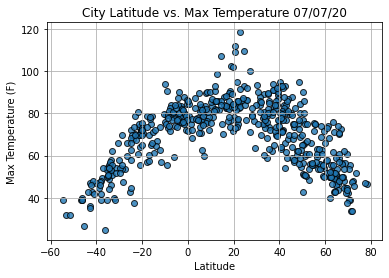

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

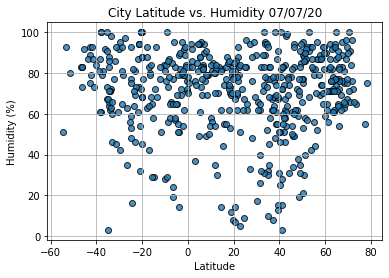

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

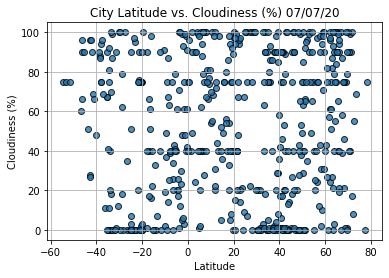

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()